**TODO:**
- **Critical:** dive into inflation expectations in the first half of 20th century (golden standard?)
- Test on data of different countries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

np.set_printoptions(suppress=True)

%matplotlib widget

In [15]:
dataset = pd.read_csv("dataset.csv",index_col="year")
dataset.head()

,inflation_rate,mean_unemployment,expected_inflation
year,,,
1948,0.016878,0.0375,0.02593
1949,-0.016667,0.0605,0.02593
1950,0.063830,0.0521,0.02593
1951,0.043307,0.0328,0.02593
1952,0.007547,0.0302,0.02593


**Developing a model to describe the phenomenon**

In [5]:
XY = dataset.loc[:,["mean_unemployment", "expected_inflation"]].dropna()
z = dataset.loc[XY.index, "inflation_rate"]

In [7]:
# TODO: typing
def r_squared(func, X, y, *params):
    y_exp = func(X, *params)
    ss_res = sum((y - y_exp)**2)
    ss_total = sum((y-y.mean())**2)
    return round(1 - ss_res / ss_total, 4)

Linear regeression

In [9]:
reg = LinearRegression().fit(XY,z)
print("Coefficients: " + str(np.array([*reg.coef_, reg.intercept_]).round(4)))
print("R^2 = " + str(r_squared(reg.predict, XY, z)))

Coefficients: [-0.2259  1.289  -0.0012]
R^2 = 0.5786


Non linear curve (a*y)/(b*x) + c

In [11]:
def curve_func(X, a, b):
    x, y = X
    return a*(y/x) + b

popt, pcov = curve_fit(curve_func, XY.T.to_numpy(), z, p0=[1,0])

print("Coefficients: " + str(popt))
print("R^2 = " + str(r_squared(curve_func, XY.T.to_numpy(), z, *popt)))

Coefficients: [ 0.07507394 -0.01691542]
R^2 = 0.4812


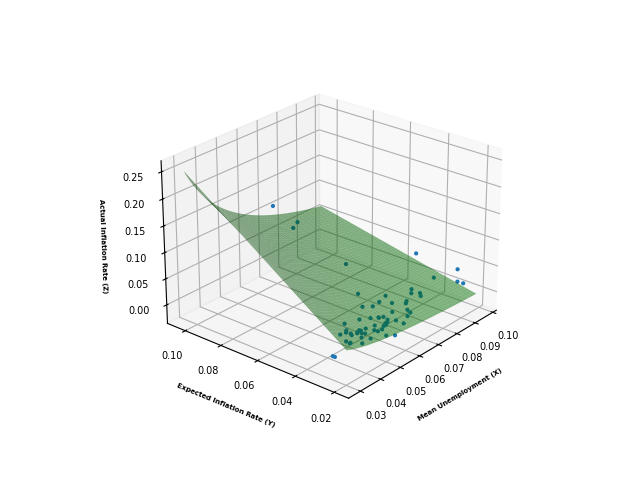

In [13]:
# plotting the data points and the fitted curve
fig = plt.figure(clear=True)
ax = fig.add_subplot(projection='3d')
fontdict = {
    "fontweight":"bold",
    "size":5,
    "fontvariant":"normal"
}

ax.view_init(25, -140, 0)
ax.scatter(xs=dataset["mean_unemployment"], ys=dataset["expected_inflation"], zs=dataset["inflation_rate"], s=4, alpha=1)

# Figure
fig.set_label("Fitted unemployment, expected inflation and the actual inflation")

# X-axis
ax.set_xlabel("Mean Unemployment (X)",fontdict=fontdict)
ax.tick_params(axis="x",labelsize=7)

# Y-axis
ax.set_ylabel("Expected Inflation Rate (Y)",fontdict=fontdict);
ax.tick_params(axis="y",labelsize=7)

# Z-axis
ax.set_zlabel("Actual Inflation Rate (Z)",fontdict=fontdict)
ax.tick_params(axis="z",labelsize=7)



x_range = np.linspace(dataset["mean_unemployment"].min(), dataset["mean_unemployment"].max()) 
y_range = np.linspace(dataset["expected_inflation"].min(), dataset["expected_inflation"].max()) 
x_plot, y_plot = np.meshgrid(x_range, y_range) 
z_plot = curve_func((x_plot, y_plot), *popt) 
ax.plot_surface(x_plot, y_plot, z_plot, color='green', alpha=0.5);